In [40]:
# Importing Packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt


df = pd.read_csv('/kaggle/input/bitcoin-price-2014-2023/BTC-USD.csv')
#def sum(a):
 # k=0
  #for i in range(len(a)):
   # k=k+a[i]

  #return k

In [41]:
d = df.dropna()
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


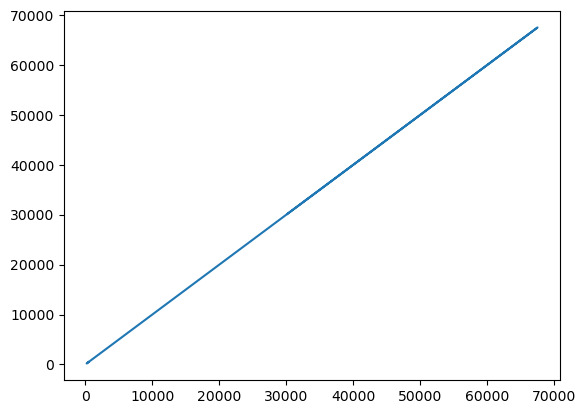

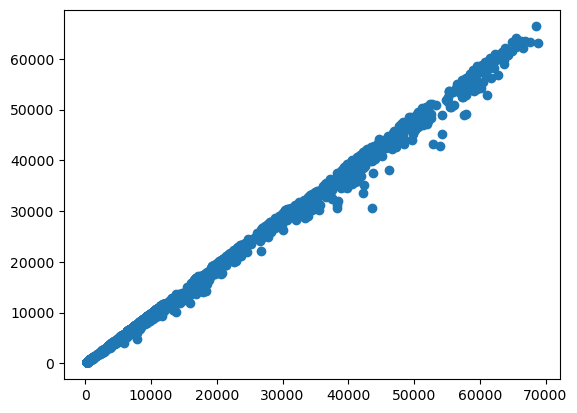

In [42]:
#print(max(d['200-Day Moving Average']))
#max_open = max(d['Open'])
#max_high = max(d['High'])
#max_low = max(d['Low'])
#max_close = max(d['Close'])
#max_adj_close = max(d['Adj Close'])
plt.plot(d['Close'], d['Adj Close'])
plt.show()
plt.scatter(d['High'], d['Low'])
plt.show()




In [43]:
op = np.array(d['Open'])
op = (op - np.mean(op)) / np.std(op)
high = np.array(d['High'])
high = (high - np.mean(high)) / np.std(high)
low = np.array(d['Low'])
low = (low - np.mean(low)) / np.std(low)
close = np.array(d['Close'])
close = (close - np.mean(close)) / np.std(close)
adj_close = np.array(d['Adj Close'])
adj_close = (adj_close - np.mean(adj_close)) / np.std(adj_close)


In [44]:
x = (op, high, low, close)
w = np.zeros(4)
derivative_w = np.zeros(4)
b = 0
derivative_b = 0
y_pred = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + w[3] * x[3] + b

In [45]:
#x_train, x_test, y_train, y_test= train_test_split(x,, test_size= 0.2)

In [46]:

a=0.02
n=len(adj_close)
kg = []
ng = []

for j in range(1000):
    y_pred = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + w[3] * x[3] + b
    for i in range(4):
        derivative_w[i] = (1 / n) * np.sum((y_pred - adj_close) * x[i].T)
        derivative_b = (1 / n) * np.sum((y_pred - adj_close))
    for i in range(4):
        w[i] -= a * derivative_w[i]
        b -= a * derivative_b
    k = (1 / (2 * n)) * np.sum((y_pred - adj_close) ** 2)
    kg.append(k)
    ng.append(j)
    
    #print(w,b)


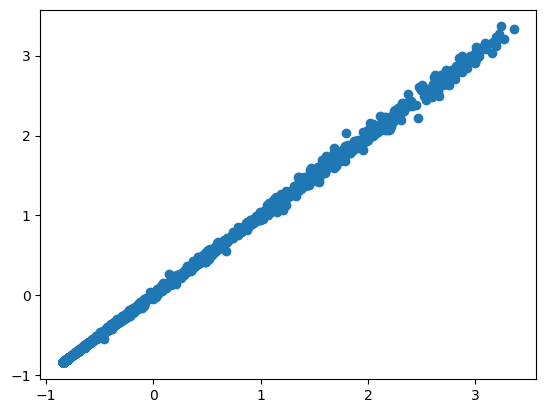

In [47]:
plt.scatter(y_pred, adj_close)
plt.show()

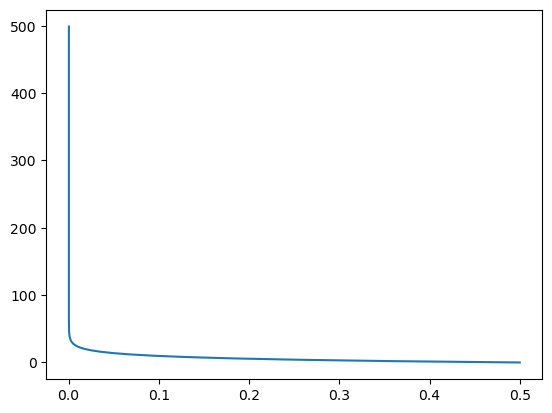

In [48]:
plt.plot(kg[0:500], ng[0:500])
plt.show()